# Drink Water Potability Challenge


Access to safe drinking water is essential to health, a basic human right, and a component of effective policy for health protection. This is important as a health and development issue at a national, regional, and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Ideas
- create categorical variables from the original ones (e.g. ph < 7, ph > 7)

## Data exploration

Plots
- histograms
- covariance / correlation matrix
- pairplots $\forall (i,j) \ (x_i, x_j)$
- circular histogram (-> proportion of true outputs)


### Imports of libraries

In [ ]:
!pip install xgboost

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from tensorflow import keras

from matplotlib import cm

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats.stats import pearsonr
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Load dataset
df = pd.read_csv('drinking_water_potability.csv')

In [ ]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

We note that we only have numerical data.

In [ ]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
# Total number of missing values
df.isna().sum().sum()

1434

In [ ]:
# Samples remaining after dropping sample having at least one NaN value
df.dropna()

ph    Hardness       Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.41744     8.059332  356.886136   
4      9.092223  181.101509  17978.98634     6.546600  310.135738   
5      5.584087  188.313324  28748.68774     7.544869  326.678363   
6     10.223862  248.071735  28749.71654     7.513408  393.663395   
7      8.635849  203.361523  13672.09176     4.563009  303.309771   
...         ...         ...          ...          ...         ...   
3267   8.989900  215.047358  15921.41202     6.297312  312.931021   
3268   6.702547  207.321086  17246.92035     7.708117  304.510230   
3269  11.491011   94.812545  37188.82602     9.263166  258.930600   
3270   6.069616  186.659040  26138.78019     7.747547  345.700257   
3271   4.668102  193.681736  47580.99160     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
6       283.651634       13.789695        84.603556   2.672989           0  
7       474.607645       12.363817        62.798309   4.401425           0  
...            ...             ...              ...        ...         ...  
3267    390.410231        9.899115        55.069304   4.613843           1  
3268    329.266002       16.217303        28.878601   3.442983           1  
3269    439.893618       16.172755        41.558501   4.369264           1  
3270    415.886955       12.067620        60.419921   3.669712           1  
3271    526.424171       13.894419        66.687695   4.435821           1  

[2011 rows x 10 columns]

In [ ]:
# Missing values per column

print("Number of missing values for :")
for column in df.columns:
    print(f'\t- {column}: {df[column].isna().sum()}')

Number of missing values for :
	- ph: 491
	- Hardness: 0
	- Solids: 0
	- Chloramines: 0
	- Sulfate: 781
	- Conductivity: 0
	- Organic_carbon: 0
	- Trihalomethanes: 162
	- Turbidity: 0
	- Potability: 0


## Plots

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

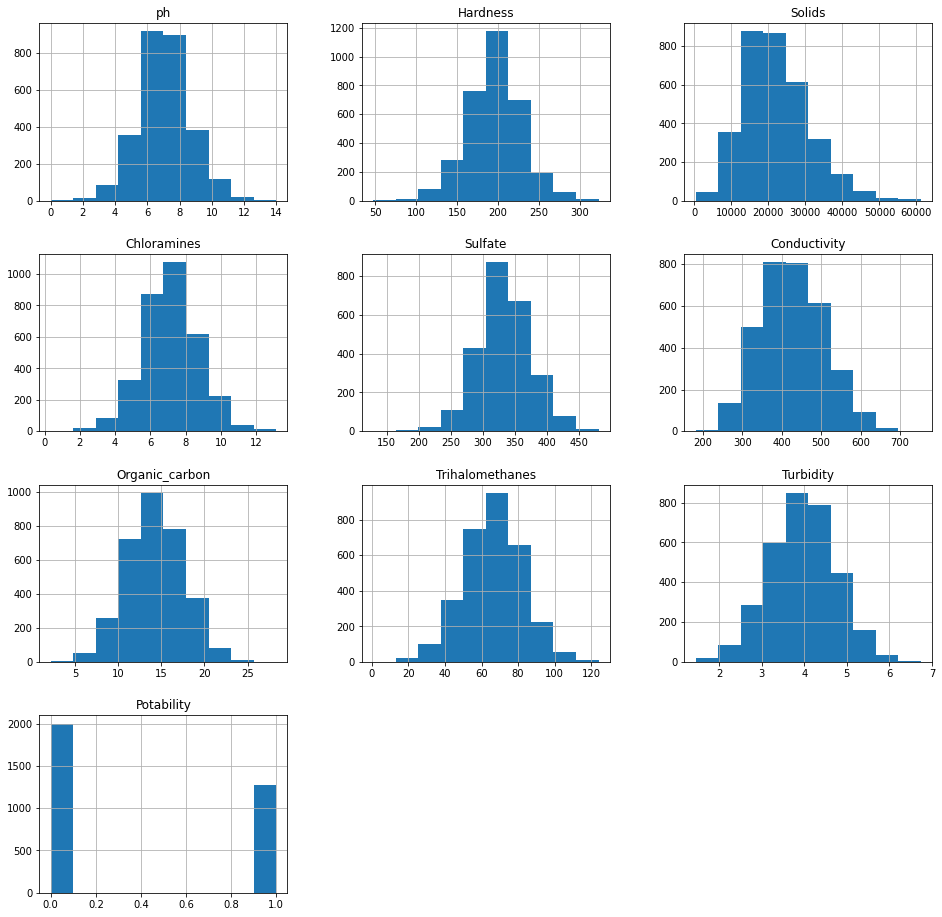

In [ ]:
# Plot histograms of data
df.hist(figsize=(16,16))

Text(0.5, 1.0, 'Proportions of potable examples')

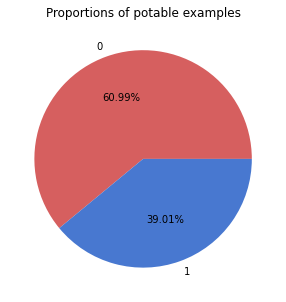

In [ ]:
# Pie chart to show class distribution
plt.figure(figsize=(5, 5));
plt.pie(df.groupby('Potability')['Hardness'].nunique(), labels=df['Potability'].unique(), autopct='%.2f%%', colors=[sns.color_palette('muted')[3], sns.color_palette('muted')[0]]);
plt.title('Proportions of potable examples')

In [ ]:
df['ph'].round()

0       NaN
1       4.0
2       8.0
3       8.0
4       9.0
       ... 
3271    5.0
3272    8.0
3273    9.0
3274    5.0
3275    8.0
Name: ph, Length: 3276, dtype: float64

We can see that the data is following a normal distribution for each features.

1998 1278


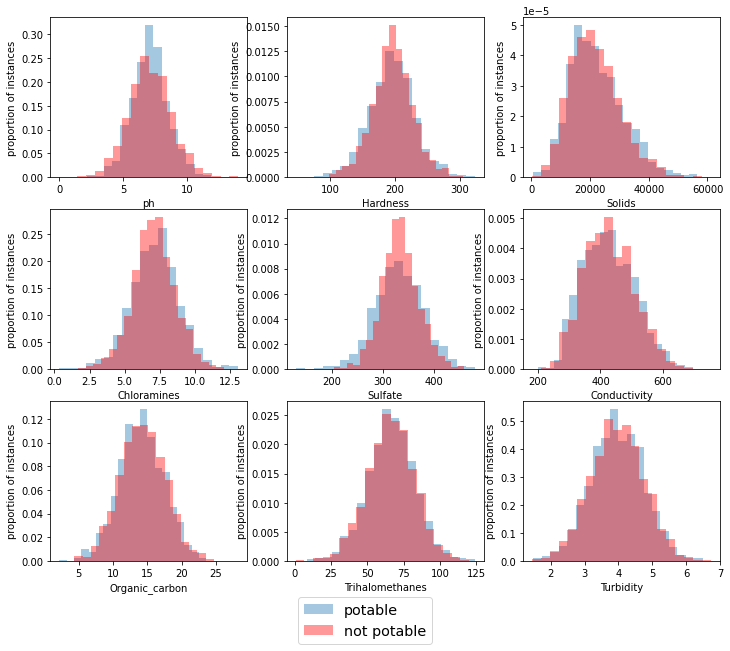

In [ ]:
# count bins
nb_pot, nb_not_pot = df.groupby('Potability')['Hardness'].nunique()
print(nb_pot, nb_not_pot)

fig = plt.figure(figsize=(12, 10))
plt.tight_layout(pad=5.0)
plt.title("Potability distribution")
# Plot number of values for which the water is potable
for k, column in enumerate(df.columns.drop('Potability')):
    plt.subplot(3, 3, k+1)
    hist1 = plt.hist(x=df[column][df['Potability'] == 1], alpha=0.4, bins=20, label='potable', density=True)
    hist2 = plt.hist(x=df[column][df['Potability'] == 0], color='red', alpha=0.4, bins=20, label='not potable', density=True)
    plt.xlabel(column)
    plt.ylabel("proportion of instances")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'lower center', fontsize='x-large')

We cannot separate data with a simple normal distribution.

<AxesSubplot:title={'center':'Correlation Matrix'}>

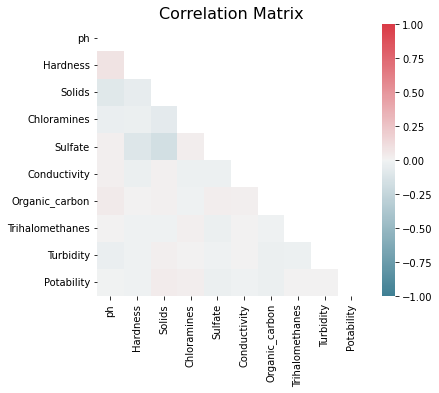

In [ ]:
# Compute mask to hide the above diagonal
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6,5))

plt.title('Correlation Matrix', fontsize=16);
sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
# Print correlation against potability
df.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

## Data processing

fill the missing values with various methods.

In [ ]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [ ]:
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='mean')
X_mean = imp_mean.fit_transform(X)

for i in range(X_mean.shape[1]):
    print("Column: {}".format(X.columns[i]))
    correlation_coefficient, p_value = pearsonr(X_mean[:, i], y)
    print("Mean (imputed values): {}".format(np.mean(X_mean[:, i])))
    print("Standard deviation (imputed values): {}".format(np.std(X_mean[:, i])))
    print("Pearson correlation coefficient (imputed values): {}".format(correlation_coefficient))
    print("\n")

Column: ph
Mean (imputed values): 7.080794504263196
Standard deviation (imputed values): 1.4697316004658354
Pearson correlation coefficient (imputed values): -0.0032868435012324603


Column: Hardness
Mean (imputed values): 196.3694960176221
Standard deviation (imputed values): 32.874742814782266
Pearson correlation coefficient (imputed values): -0.013836558096163564


Column: Solids
Mean (imputed values): 22014.09252612909
Standard deviation (imputed values): 8767.232421203751
Pearson correlation coefficient (imputed values): 0.03374331339090684


Column: Chloramines
Mean (imputed values): 7.122276793427656
Standard deviation (imputed values): 1.5828432520464306
Pearson correlation coefficient (imputed values): 0.02377897200278506


Column: Sulfate
Mean (imputed values): 333.775776610501
Standard deviation (imputed values): 36.13709547360599
Pearson correlation coefficient (imputed values): -0.020619084367513325


Column: Conductivity
Mean (imputed values): 426.205110682326
Standard de

Thera are only features with weak correlations with y.

In [ ]:
# Instantiate a transformer for iterative imputation.
it_imp = IterativeImputer()
X_it_imp = it_imp.fit_transform(X)

for i in range(X_it_imp.shape[1]):
    print("Column: {}".format(X.columns[i]))
    correlation_coefficient, p_value = pearsonr(X_it_imp[:, i], y)
    print("Mean (imputed values): {}".format(np.mean(X_it_imp[:, i])))
    print("Standard deviation (imputed values): {}".format(np.std(X_it_imp[:, i])))
    print("Pearson correlation coefficient (imputed values): {}".format(correlation_coefficient))
    print("\n")

Column: ph
Mean (imputed values): 7.080140842073166
Standard deviation (imputed values): 1.4713494465496124
Pearson correlation coefficient (imputed values): -0.004296315436009307


Column: Hardness
Mean (imputed values): 196.3694960176221
Standard deviation (imputed values): 32.874742814782266
Pearson correlation coefficient (imputed values): -0.013836558096163564


Column: Solids
Mean (imputed values): 22014.09252612909
Standard deviation (imputed values): 8767.232421203751
Pearson correlation coefficient (imputed values): 0.03374331339090684


Column: Chloramines
Mean (imputed values): 7.122276793427656
Standard deviation (imputed values): 1.5828432520464306
Pearson correlation coefficient (imputed values): 0.02377897200278506


Column: Sulfate
Mean (imputed values): 333.78501107547305
Standard deviation (imputed values): 36.382284762038516
Pearson correlation coefficient (imputed values): -0.020471087305175092


Column: Conductivity
Mean (imputed values): 426.205110682326
Standard 

In [ ]:
X_it_imp_df = pd.DataFrame(X_it_imp, columns=X.columns)

#pH
ph_class = []
for ph in X_it_imp_df['ph']:
    if (ph < 6.5 or ph > 8.5):
        ph_class.append(0)
    else:
        ph_class.append(1)
X_it_imp_df['ph_class'] = ph_class

#solids
solids_class = []
for solids in X_it_imp_df['Solids']:
    if (solids < 1000):
        solids_class.append(0)
    else:
        solids_class.append(1)
X_it_imp_df['solids_class'] = solids_class

#chloramines
chloramines_class = []
for chloramines in X_it_imp_df['Chloramines']:
    if (chloramines > 0.4):
        chloramines_class.append(0)
    else:
        chloramines_class.append(1)
X_it_imp_df['chloramines_class'] = chloramines_class

#conductivity
conductivity_class = []
for conductivity in X_it_imp_df['Conductivity']:
    if (conductivity < 400):
        conductivity_class.append(0)
    else:
        conductivity_class.append(1)
X_it_imp_df['conductivity_class'] = conductivity_class

#organic_carbon
organic_carbon_class = []
for organic_carbon in X_it_imp_df['Organic_carbon']:
    if (organic_carbon < 2):
        organic_carbon_class.append(0)
    else:
        organic_carbon_class.append(1)
X_it_imp_df['organic_carbon_class'] = organic_carbon_class

#trihalomethanes
trihalomethanes_class = []
for trihalomethanes in X_it_imp_df['Trihalomethanes']:
    if (trihalomethanes < 80):
        trihalomethanes_class.append(0)
    else:
        trihalomethanes_class.append(1)
X_it_imp_df['trihalomethanes_class'] = trihalomethanes_class

Text(0.5, 1.0, 'Non potable water')

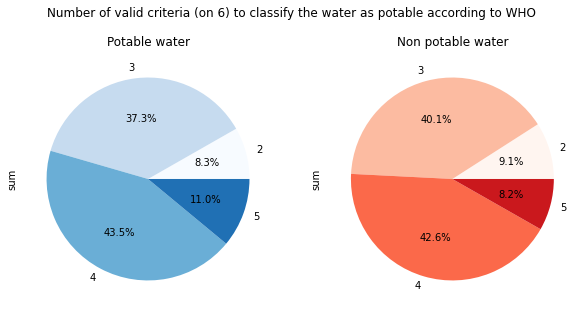

In [ ]:
# colormap
cs_pot=cm.Blues(np.arange(4)/4)
cs_non_pot=cm.Reds(np.arange(4)/4)

s = X_it_imp_df['ph_class'] + X_it_imp_df['solids_class'] + X_it_imp_df['chloramines_class'] + X_it_imp_df['conductivity_class'] + X_it_imp_df['organic_carbon_class'] + X_it_imp_df['trihalomethanes_class']
X_it_imp_df_copy = X_it_imp_df.copy()
X_it_imp_df_copy['sum'] = s

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Number of valid criteria (on 6) to classify the water as potable according to WHO')

plt.subplot(121)
data_potable = X_it_imp_df_copy[df['Potability'] == 1].groupby("sum")['sum'].sum()
data_potable.plot.pie(autopct="%.1f%%", colors=cs_pot);
plt.title('Potable water')

plt.subplot(122)
data_not_potable = X_it_imp_df_copy[df['Potability'] == 0].groupby("sum")['sum'].sum()
data_not_potable.plot.pie(autopct="%.1f%%", colors=cs_non_pot);
plt.title('Non potable water')

In [ ]:
new_X = X_it_imp_df[['ph_class', 'solids_class', 'chloramines_class', 'conductivity_class', 'organic_carbon_class', 'trihalomethanes_class']]

## PCA
To see which features have the most the variance (~explain the most variability in the data)

Text(0.5, 1.0, 'Two first PCA components')

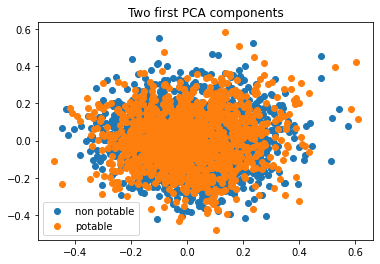

In [ ]:
# scale data
pca_scaler = MinMaxScaler()
X_lda = pca_scaler.fit_transform(X_it_imp)

pca = decomposition.PCA(n_components=2)
X_2d = pca.fit_transform(X_lda)

assert y.shape[0] == X_2d.shape[0], "X and y  dont have the same number of data points"

# 2 colors for the 2 classes
plt.scatter(X_2d[y == 0][:, 0], X_2d[y == 0][:, 1], label='non potable')
plt.scatter(X_2d[y == 1][:, 0], X_2d[y == 1][:, 1], label='potable')
plt.legend()
plt.title("Two first PCA components")

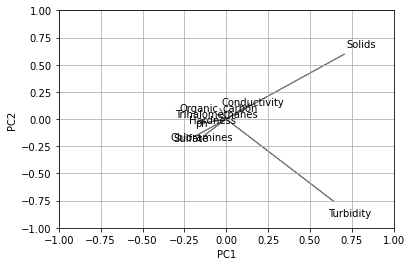

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    # plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_2d,np.transpose(pca.components_[0:2, :]), df.columns)
plt.show()

## LDA

Les composantes obtenues devraient maximiser la séparation des deux classes

In [ ]:
print(type(X_it_imp_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
y_2_classes = np.array([y==0, y==1]).T
print(y_2_classes)
print(X_it_imp_df.shape, y_2_classes.shape)

[[ True False]
 [ True False]
 [ True False]
 ...
 [False  True]
 [False  True]
 [False  True]]
(3276, 15) (3276, 2)


(3276, 1)


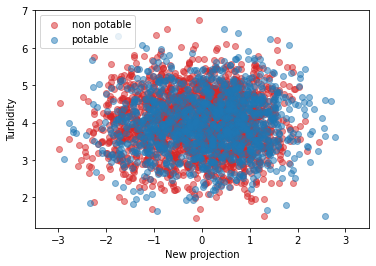

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
assert X_it_imp_df.shape[1] > 2
X_2d_lda = lda.fit_transform(X_it_imp_df, y)
print(X_2d_lda.shape)

# caractéristique à comparer à la nouvelle projection
feature = 'Turbidity'

# 2 colors for the 2 classes
plt.scatter(X_2d_lda[y == 0], X_it_imp_df[feature][y == 0], label='non potable', color='tab:red', alpha=0.5)
plt.scatter(X_2d_lda[y == 1], X_it_imp_df[feature][y == 1], label='potable', alpha=0.5)
plt.xlabel("New projection")
plt.ylabel(feature)
plt.xlim(-3.5,3.5)
plt.legend()


## Scaling data

#### Test with and without standard scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_it_imp, y, test_size=0.2, random_state=42)

In [ ]:
pipe = make_pipeline(MinMaxScaler(), SGDClassifier())
pipe.fit(X_train, y_train)
Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('sgd_classifier', SGDClassifier())])
pipe.score(X_test, y_test)

0.6280487804878049

In [ ]:
pipe = make_pipeline(SGDClassifier())
pipe.fit(X_train, y_train)
Pipeline(steps=[('sgd_classifier', SGDClassifier())])
pipe.score(X_test, y_test)

0.3719512195121951

In [ ]:
scaler = MinMaxScaler()
X_it_imp = scaler.fit_transform(X_it_imp)

## Splitting data in train and test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_it_imp, y, test_size=0.2, random_state=42)

## Creation of a baseline model

Training of a linear model to which compare the performance of future models

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
sdg = SGDClassifier()
sdg_scores = cross_validate(sdg, X_train, y_train, cv=cv, scoring=('accuracy', 'roc_auc'), return_train_score=True, return_estimator=True)

In [ ]:
# worse than random algorithm
print(f"Baseline model : \n\taccuracy :{np.mean(sdg_scores['test_accuracy'])},\n\tROC AUC :{np.mean(sdg_scores['test_roc_auc'])}") 

Baseline model : 
	accuracy :0.5675572519083969,
	ROC AUC :0.4895916065799092


## Decision tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree_scores = cross_validate(decision_tree, X_train, y_train, cv=cv, scoring=('accuracy', 'roc_auc'), return_train_score=True, return_estimator=True)

In [ ]:
print(f"Decision Tree : \n\taccuracy :{np.mean(decision_tree_scores['test_accuracy'])},\n\tROC AUC :{np.mean(decision_tree_scores['test_roc_auc'])}") 

Decision Tree : 
	accuracy :0.5751908396946566,
	ROC AUC :0.5565363352886917


## Random forest classifier

In [ ]:
random_forest = RandomForestClassifier(max_depth=3, random_state=0)
random_forest_scores = cross_validate(random_forest, X_train, y_train, cv=cv, scoring=('accuracy', 'roc_auc'), return_train_score=True, return_estimator=True)

In [ ]:
print(f"Random forest : \n\taccuracy :{np.mean(random_forest_scores['test_accuracy'])},\n\tROC AUC :{np.mean(random_forest_scores['test_roc_auc'])}") 

Random forest : 
	accuracy :0.6259541984732825,
	ROC AUC :0.6027968277665972


## Gradient boosting

In [ ]:
xgboost = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=0)
xgboost_scores = cross_validate(xgboost, X_train, y_train, cv=cv, scoring=('accuracy', 'roc_auc'), return_train_score=True, return_estimator=True)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[19:03:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and

In [ ]:
print(f"Gradient boosting : \n\taccuracy :{np.mean(xgboost_scores['test_accuracy'])},\n\tROC AUC :{np.mean(xgboost_scores['test_roc_auc'])}") 

Gradient boosting : 
	accuracy :0.6305343511450382,
	ROC AUC :0.6310334767623524


# Compare and plot results

In [ ]:
columns = ['SGD', 'Decision Tree', 'Random Forest', 'XGBoost']
train_roc_auc = pd.DataFrame(np.transpose([sdg_scores['train_roc_auc'], decision_tree_scores['train_roc_auc'], random_forest_scores['train_roc_auc'], xgboost_scores['train_roc_auc']]), columns=columns)
test_roc_auc = pd.DataFrame(np.transpose([sdg_scores['test_roc_auc'], decision_tree_scores['test_roc_auc'], random_forest_scores['test_roc_auc'], xgboost_scores['test_roc_auc']]), columns=columns)
train_accuracy = pd.DataFrame(np.transpose([sdg_scores['train_accuracy'], decision_tree_scores['train_accuracy'], random_forest_scores['train_accuracy'], xgboost_scores['train_accuracy']]), columns=columns)
test_accuracy = pd.DataFrame(np.transpose([sdg_scores['test_accuracy'], decision_tree_scores['test_accuracy'], random_forest_scores['test_accuracy'], xgboost_scores['test_roc_auc']]), columns=columns)


<AxesSubplot:title={'center':'Train ROC AUC'}>

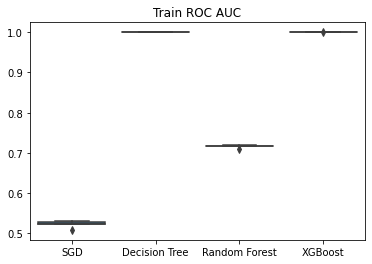

In [ ]:
plt.title('Train ROC AUC')
sns.boxplot(data=train_roc_auc)

<AxesSubplot:title={'center':'Validation ROC AUC'}>

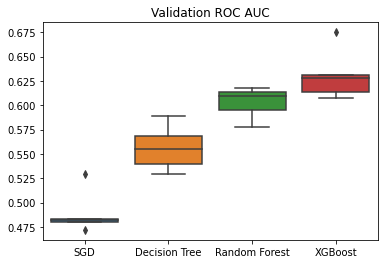

In [ ]:
plt.title('Validation ROC AUC')
sns.boxplot(data=test_roc_auc)

<AxesSubplot:title={'center':'Train accuracy'}>

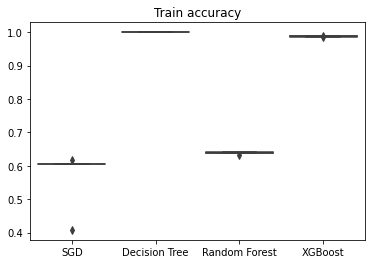

In [ ]:
plt.title('Train accuracy')
sns.boxplot(data=train_accuracy)

<AxesSubplot:title={'center':'Validation accuracy'}>

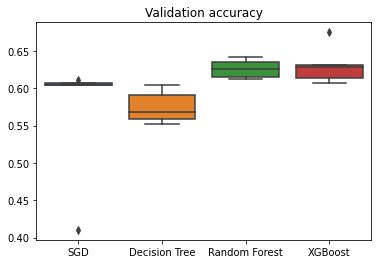

In [ ]:
plt.title('Validation accuracy')
sns.boxplot(data=test_accuracy)

## Grid search with CV on Decision Tree and Random Forest

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
params = {
        'learning_rate' : [0.001, 0.01, 0.1],
        'n_estimators': [10, 50, 100, 150, 200],
        'max_depth': [3, 4, 5],
        'colsample_bytree': [0.6, 0.8, 1.0],
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=cv, verbose=10, random_state=1001 )

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[19:12:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsa

In [ ]:
print('\n Best score:')
print(random_search.best_score_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)

test_score = roc_auc_score(random_search.predict(X_test), y_test)
print('\n Test score:')
print(test_score)



 Best score:
0.6415015343574353

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

 Best hyperparameters:
{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

 Test score:
0.6426373106060606


In [ ]:
print('\n Best score:')
print(clf.best_score_)
print('\n Best estimator:')
print(clf.best_estimator_)
print('\n Best hyperparameters:')
print(clf.best_params_)


 Best score:


NameError: name 'clf' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_it_imp, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    learning_rate=0.02,
    n_estimators=600,
    objective='binary:logistic',
    silent=True,
    nthread=1,
    subsample=0.8,
    min_child_weight=1,
    max_depth=4,
    gamma=1,
    colsample_bytree=1.0
)

In [ ]:
pipe = make_pipeline(StandardScaler(), xgboost)
pipe.fit(X_train, y_train)
Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('xgboost', xgb_model)])
pipe.score(X_test, y_test)

0.6295731707317073

## Neural Network

In [ ]:
def create_nn_classifier():
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(9,)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(128, activation='tanh'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.2))
    # model.add(keras.layers.Dense(128, activation='relu'))
    # model.add(keras.layers.BatchNormalization())
    # model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(64, activation='tanh'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.2))
    # model.add(keras.layers.Dense(32, activation='relu'))
    # model.add(keras.layers.BatchNormalization())
    # model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
    return model

nn_clf = create_nn_classifier()
nn_clf.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [ ]:
x_sc = StandardScaler()
X_trains = x_sc.fit_transform(X_train)
X_tests = x_sc.transform(X_test)

# no need to scale y

In [ ]:
nn_clf = create_nn_classifier()
history = nn_clf.fit(X_trains, y_train, validation_split=0.2,
          batch_size=256, epochs=300)

Epoch 1/300
9/9 [==============================] - 2s 60ms/step - loss: 0.9211 - accuracy: 0.5064 - val_loss: 0.6808 - val_accuracy: 0.5668
Epoch 2/300
9/9 [==============================] - 0s 16ms/step - loss: 0.8428 - accuracy: 0.5059 - val_loss: 0.6689 - val_accuracy: 0.6069
Epoch 3/300
9/9 [==============================] - 0s 16ms/step - loss: 0.7934 - accuracy: 0.5276 - val_loss: 0.6689 - val_accuracy: 0.6011
Epoch 4/300
9/9 [==============================] - 0s 14ms/step - loss: 0.7999 - accuracy: 0.5219 - val_loss: 0.6726 - val_accuracy: 0.6088
Epoch 5/300
9/9 [==============================] - 0s 18ms/step - loss: 0.7934 - accuracy: 0.5329 - val_loss: 0.6676 - val_accuracy: 0.6050
Epoch 6/300
9/9 [==============================] - 0s 13ms/step - loss: 0.7638 - accuracy: 0.5366 - val_loss: 0.6733 - val_accuracy: 0.6069
Epoch 7/300
9/9 [==============================] - 0s 18ms/step - loss: 0.7473 - accuracy: 0.5536 - val_loss: 0.6783 - val_accuracy: 0.6050
Epoch 8/300
9/9 [===

Max val accuracy : 0.7022900581359863


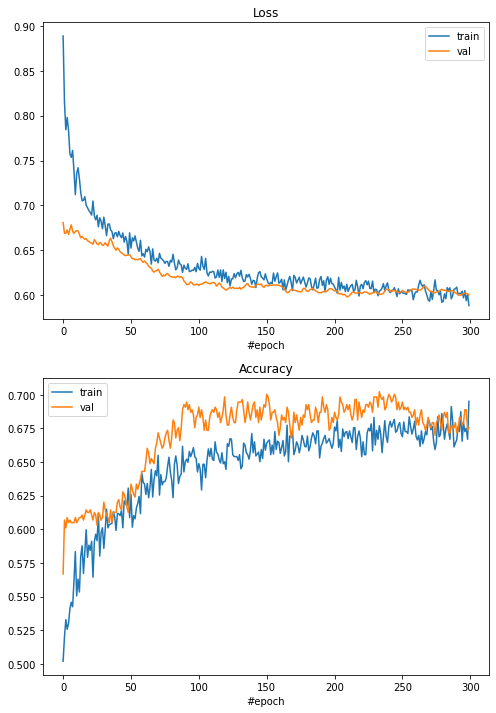

In [ ]:
# display the loss curves
plt.figure(figsize=(8, 12))
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.xlabel("#epoch")
plt.legend()

# accuracy evolution
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.xlabel("#epoch")
plt.legend()

print(f"Max val accuracy : {max(history.history['val_accuracy'])}")

In [ ]:
# predict and test results
y_pred = nn_clf.predict(X_tests)
print("Test accuracy :", accuracy_score(y_pred, y_test))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

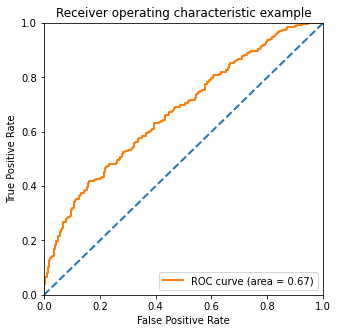

In [ ]:
# ROC curve
roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='tab:orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='tab:blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ca0efcc-526f-49f4-a23e-7bce689afa96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>